<a href="https://colab.research.google.com/github/DushyantKhinchi/Tesla-Vs-General-Motors-Time-Series-Analysis/blob/master/TSLA_VS_GM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
!ls 'drive/My Drive/GM_VS_TSLA/'

GM.csv		      Tesla_google_trends.csv  Untitled0.ipynb
GM_google_trends.csv  TSLA.csv


In [0]:
TSLA=pd.read_csv('drive/My Drive/GM_VS_TSLA/TSLA.csv')
GM=pd.read_csv('drive/My Drive/GM_VS_TSLA/GM.csv')

In [58]:
TSLA.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [59]:
GM.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-11-18,35.000000,35.990002,33.889999,34.189999,26.155519,457044300
1,2010-11-19,34.150002,34.500000,33.110001,34.259998,26.209070,107842000
2,2010-11-22,34.200001,34.480000,33.810001,34.080002,26.071363,36650600
3,2010-11-23,33.950001,33.990002,33.189999,33.250000,25.436413,31170200
4,2010-11-24,33.730000,33.799999,33.220001,33.480000,25.612371,26138000


In [60]:
TSLA=TSLA[TSLA['Date']>='2010-11-18'].reset_index()
TSLA.drop('index', axis=1, inplace=True)
TSLA.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-11-18,30.670000,30.740000,28.920000,29.889999,29.889999,956100
1,2010-11-19,30.160000,31.370001,29.700001,30.990000,30.990000,1150500
2,2010-11-22,31.570000,33.450001,31.500000,33.400002,33.400002,1529700
3,2010-11-23,33.290001,35.680000,32.189999,34.570000,34.570000,1577800
4,2010-11-24,35.270000,35.970001,34.330002,35.470001,35.470001,1425000


In [0]:
TSLA.set_index('Date', inplace=True)
GM.set_index('Date', inplace=True)

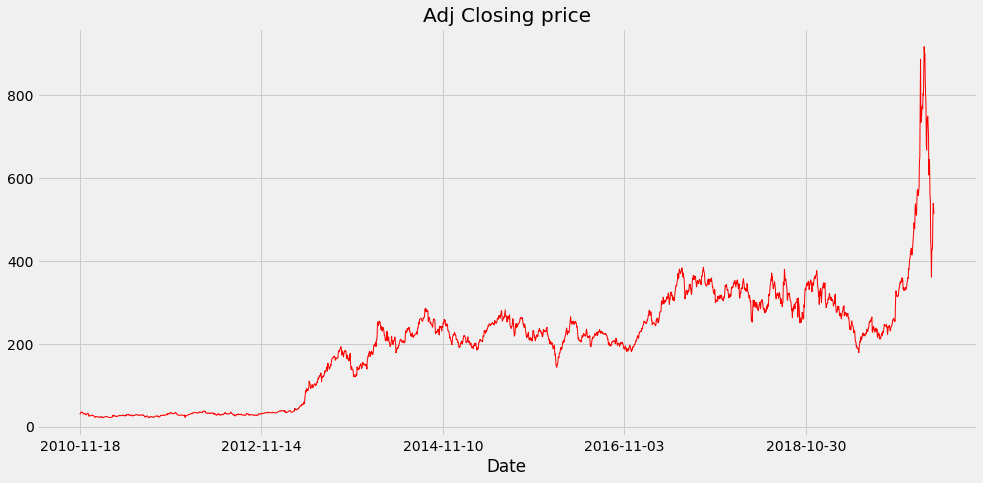

In [62]:
plt.style.use('fivethirtyeight')
TSLA['Adj Close'].plot(label='TSLA', figsize=(15,7), title='Adj Closing price', color='red', linewidth=1)

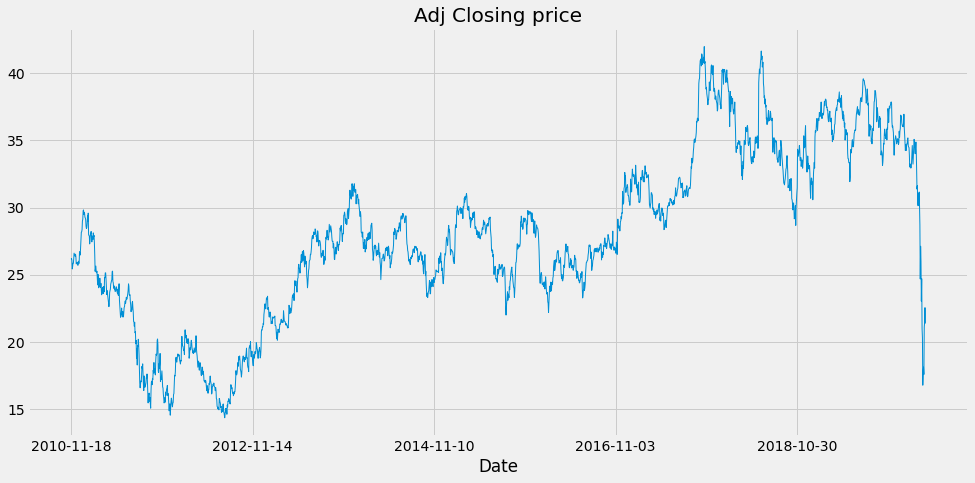

In [63]:
GM['Adj Close'].plot(label='GM', figsize=(15,7), title='Adj Closing price', linewidth=1)

In [0]:
TSLA=TSLA[TSLA.index<='2019-12-31']
GM=GM[GM.index<='2019-12-31']

In [0]:
TSLA.index=pd.to_datetime(TSLA.index)
TSLA['Year']=TSLA.index.year


GM.index=pd.to_datetime(GM.index)
GM['Year']=GM.index.year

In [0]:
TSLA.reset_index(level=0, inplace=True)
GM.reset_index(level=0, inplace=True)

In [67]:
#Calculating market capitalization
#Yearly average number of shares outstanding for Tesla and GM
tesla_shares = {2019: 177e6, 2018: 168e6, 2017: 162e6, 2016: 144e6, 2015: 128e6, 2014: 125e6, 2013: 119e6, 2012: 107e6, 2011: 100e6, 2010: 51e6}
gm_shares = {2019: 1.44e9, 2018: 1.42e9, 2017: 1.50e9, 2016: 1.54e9, 2015: 1.59e9, 2014: 1.61e9, 2013: 1.39e9, 2012: 1.57e9, 2011: 1.54e9, 2010:1.50e9}

TSLA['Cap']=0
GM['Cap']=0

for i, year in enumerate(TSLA['Year']):
  #Retrieve number of shares outstanding
  shares=tesla_shares.get(year)
  TSLA['Cap'].iloc[i]=shares*TSLA['Adj Close'].iloc[i]

for i, year in enumerate(GM['Year']):
  #Retrieve number of shares outstanding
  shares=gm_shares.get(year)
  GM['Cap'].iloc[i]=shares*GM['Adj Close'].iloc[i]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
TSLA=TSLA[['Date','Cap']]
GM=GM[['Date', 'Cap']]

In [69]:
# Joining two datasets on Date
Cars = GM.merge(TSLA, on='Date', how='inner')
Cars.rename(columns={'Cap_x':'GM_cap','Cap_y':'TSLA_cap'},inplace=True)
Cars

,Date,GM_cap,TSLA_cap
0,2010-11-18,3.923328e+10,1.524390e+09
1,2010-11-19,3.931360e+10,1.580490e+09
2,2010-11-22,3.910704e+10,1.703400e+09
3,2010-11-23,3.815462e+10,1.763070e+09
4,2010-11-24,3.841856e+10,1.808970e+09
...,...,...,...
2289,2019-12-24,5.204036e+10,7.526925e+10
2290,2019-12-26,5.189810e+10,7.627638e+10
2291,2019-12-27,5.201191e+10,7.617726e+10
2292,2019-12-30,5.184119e+10,7.340190e+10


In [70]:
#Converting market cap in billions
Cars['GM_cap']=Cars['GM_cap']/1e9
Cars['TSLA_cap']=Cars['TSLA_cap']/1e9
Cars

,Date,GM_cap,TSLA_cap
0,2010-11-18,39.233278,1.524390
1,2010-11-19,39.313605,1.580490
2,2010-11-22,39.107045,1.703400
3,2010-11-23,38.154620,1.763070
4,2010-11-24,38.418557,1.808970
...,...,...,...
2289,2019-12-24,52.040363,75.269250
2290,2019-12-26,51.898095,76.276380
2291,2019-12-27,52.011909,76.177261
2292,2019-12-30,51.841187,73.401902


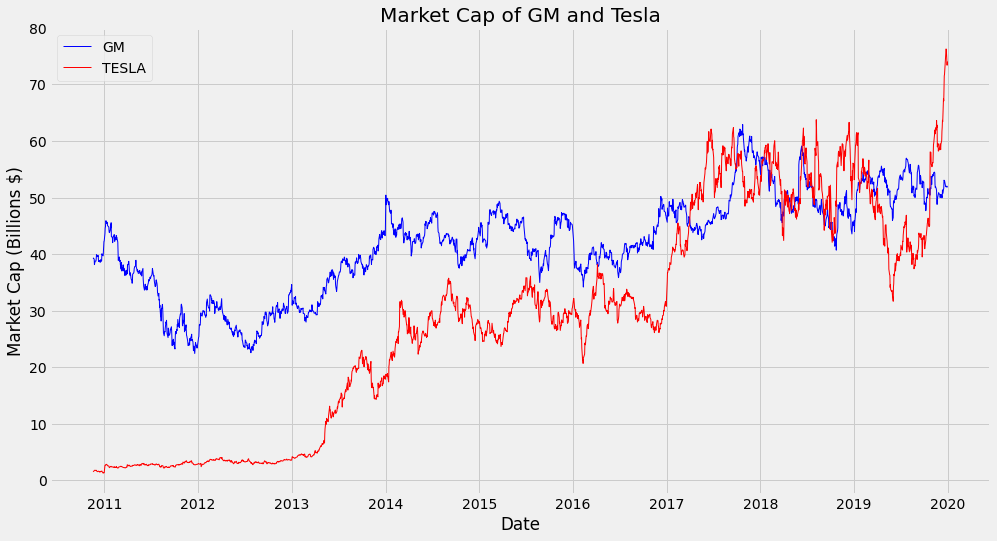

In [71]:
plt.figure(figsize=(15, 8))
plt.plot(Cars['Date'], Cars['GM_cap'], 'b-', label = 'GM', linewidth=1.0 )
plt.plot(Cars['Date'], Cars['TSLA_cap'], 'r-', label = 'TESLA', linewidth=1.0 )
plt.xlabel('Date'); plt.ylabel('Market Cap (Billions $)'); plt.title('Market Cap of GM and Tesla')
plt.legend();

# Prophet

In [72]:
pip install fbprophet

In [0]:
import fbprophet
#Prophet only processes data frame with column names ds & y
GM = GM.rename(columns={'Date':'ds','Cap':'y'})
GM['y'] = GM['y']/1e9

TSLA = TSLA.rename(columns={'Date':'ds','Cap':'y'})
TSLA['y'] = TSLA['y']/1e9


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


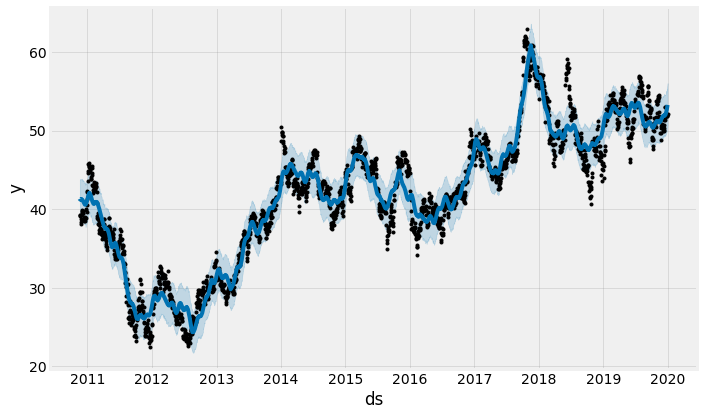

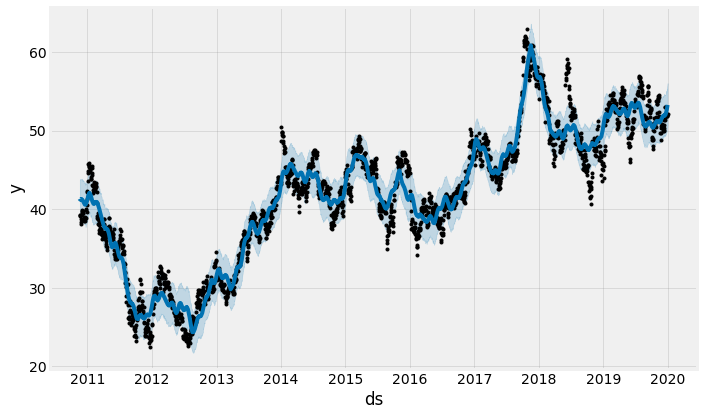

In [74]:
#This hyperparameter is used to control how sensitive the trend is to changes, with a higher value being more sensitive and a lower value less sensitive.
#When a model is underfitting, increasing the changepoint prior allows more flexibility for the model to fit the data, and if the model is overfitting, decreasing the prior limits the amount of flexibility. 


GM_prophet = fbprophet.Prophet(changepoint_prior_scale=0.25)
GM_prophet.fit(GM)
GM_predictions=GM_prophet.predict(pd.DataFrame(GM['ds']))
GM_prophet.plot(GM_predictions)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


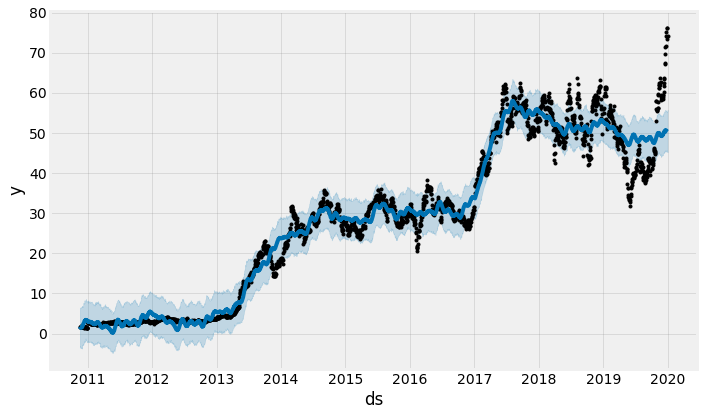

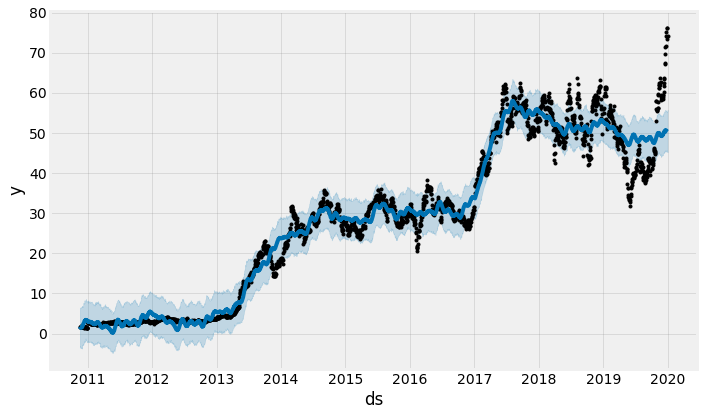

In [75]:
TSLA_prophet = fbprophet.Prophet(changepoint_prior_scale=0.25)
TSLA_prophet.fit(TSLA)
TSLA_predictions=TSLA_prophet.predict(pd.DataFrame(TSLA['ds']))
TSLA_prophet.plot(TSLA_predictions)

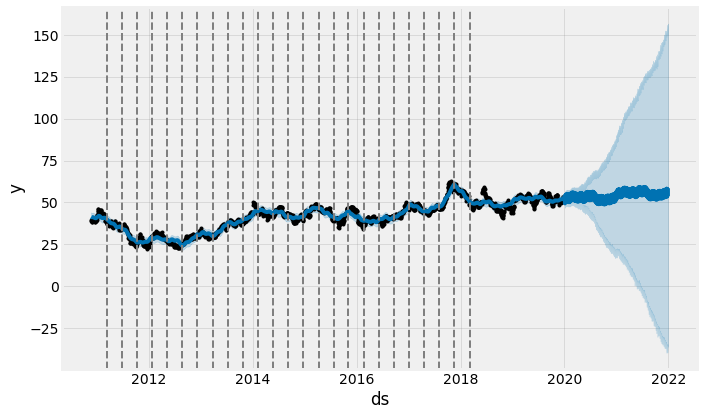

In [76]:
#Future data frame for two years
future = GM_prophet.make_future_dataframe(periods=365*2, freq='D')
GM_forecast = GM_prophet.predict(future)
GM_prophet.plot(GM_forecast)
for cp in GM_prophet.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

In [77]:
GM_prophet.changepoints[:10]

73    2011-03-07
147   2011-06-21
220   2011-10-04
293   2012-01-19
367   2012-05-04
440   2012-08-17
514   2012-12-05
587   2013-03-22
660   2013-07-08
734   2013-10-21
Name: ds, dtype: datetime64[ns]

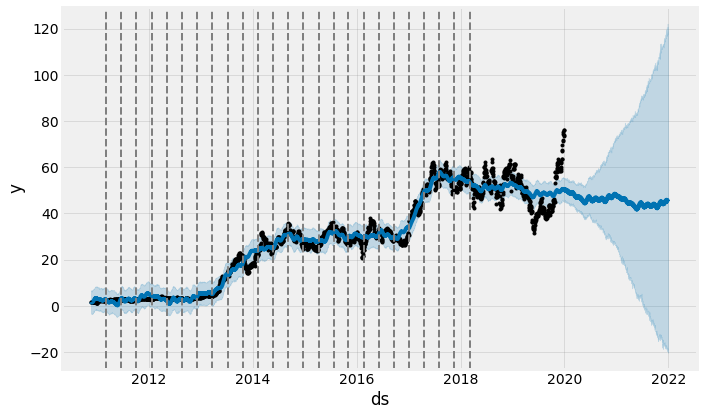

In [78]:

future = TSLA_prophet.make_future_dataframe(periods=365*2, freq='D')
TSLA_forecast = TSLA_prophet.predict(future)
TSLA_prophet.plot(TSLA_forecast)
for cp in TSLA_prophet.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

In [79]:
#Change points
TSLA_prophet.changepoints


73     2011-03-07
147    2011-06-21
220    2011-10-04
293    2012-01-19
367    2012-05-04
440    2012-08-17
514    2012-12-05
587    2013-03-22
660    2013-07-08
734    2013-10-21
807    2014-02-05
880    2014-05-21
954    2014-09-05
1027   2014-12-18
1100   2015-04-07
1174   2015-07-22
1247   2015-11-03
1320   2016-02-19
1394   2016-06-06
1467   2016-09-19
1541   2017-01-04
1614   2017-04-20
1687   2017-08-03
1761   2017-11-16
1834   2018-03-06
Name: ds, dtype: datetime64[ns]

In [0]:
#Comparison with google search trends
TSLA_trends=pd.read_csv('drive/My Drive/GM_VS_TSLA/Tesla_google_trends.csv')
TSLA_trends=TSLA_trends[TSLA_trends['Month']>='2010-11']

GM_trends=pd.read_csv('drive/My Drive/GM_VS_TSLA/GM_google_trends.csv')
GM_trends=GM_trends[GM_trends['Month']>='2010-11']


TSLA_trends['Month']= pd.to_datetime(TSLA_trends['Month'], format='%Y-%m')
GM_trends['Month']=pd.to_datetime(GM_trends['Month'], format='%Y-%m')

In [81]:
GM_trends['Month']

82    2010-11-01
83    2010-12-01
84    2011-01-01
85    2011-02-01
86    2011-03-01
         ...    
190   2019-11-01
191   2019-12-01
192   2020-01-01
193   2020-02-01
194   2020-03-01
Name: Month, Length: 113, dtype: datetime64[ns]

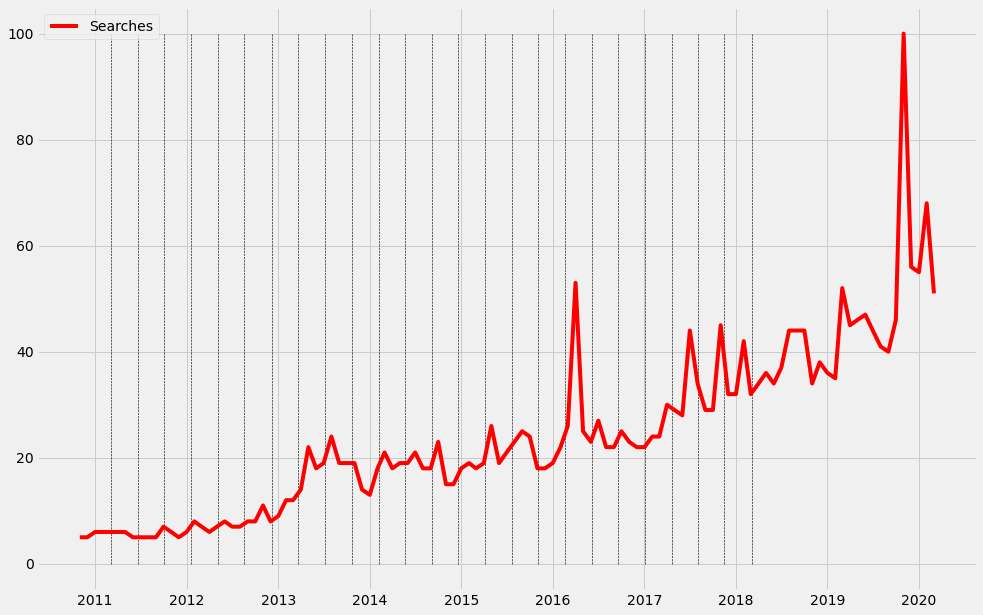

In [82]:
#ploting frequency
from matplotlib.pyplot import figure
figure(figsize=(15,10))
plt.plot(TSLA_trends['Month'], TSLA_trends['Frequency'], label='Searches', color='red')
plt.legend()

#ploting change points
plt.vlines(TSLA_prophet.changepoints, ymin = 0, ymax= 100, colors = 'black', linewidth=0.6, linestyles = 'dashed', label = 'Changepoints')

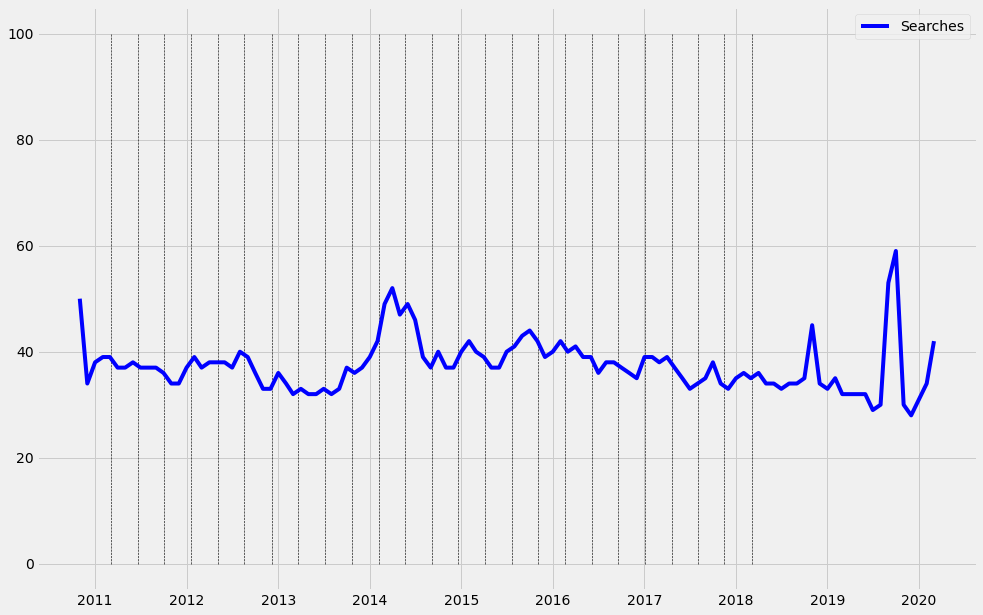

In [83]:
from matplotlib.pyplot import figure
figure(figsize=(15,10))
plt.plot(GM_trends['Month'], GM_trends['Frequency'], label='Searches', color='blue')
plt.legend()

#ploting change points
plt.vlines(GM_prophet.changepoints, ymin = 0, ymax= 100, colors = 'black', linewidth=0.6, linestyles = 'dashed', label = 'Changepoints')

In [84]:
merge_tesla_forecast =TSLA_forecast.copy()
merge_tesla_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2010-11-18,0.627116,-3.131876,6.645868,0.627116,0.627116,1.066473,1.066473,1.066473,-0.148976,-0.148976,-0.148976,1.215450,1.215450,1.215450,0.0,0.0,0.0,1.693589
1,2010-11-19,0.640345,-3.394221,6.291711,0.640345,0.640345,0.933922,0.933922,0.933922,-0.221145,-0.221145,-0.221145,1.155067,1.155067,1.155067,0.0,0.0,0.0,1.574268
2,2010-11-22,0.680035,-3.480849,6.913123,0.680035,0.680035,0.856238,0.856238,0.856238,-0.140851,-0.140851,-0.140851,0.997090,0.997090,0.997090,0.0,0.0,0.0,1.536273
3,2010-11-23,0.693265,-3.305839,6.861245,0.693265,0.693265,0.856500,0.856500,0.856500,-0.101708,-0.101708,-0.101708,0.958208,0.958208,0.958208,0.0,0.0,0.0,1.549765
4,2010-11-24,0.706494,-3.655920,6.139038,0.706494,0.706494,0.731014,0.731014,0.731014,-0.197758,-0.197758,-0.197758,0.928771,0.928771,0.928771,0.0,0.0,0.0,1.437508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,2021-12-26,43.035359,-19.253717,122.223216,-20.995764,117.428680,2.745812,2.745812,2.745812,0.405219,0.405219,0.405219,2.340593,2.340593,2.340593,0.0,0.0,0.0,45.781171
3020,2021-12-27,43.028168,-18.541458,117.755715,-21.187805,117.588276,2.157357,2.157357,2.157357,-0.140851,-0.140851,-0.140851,2.298209,2.298209,2.298209,0.0,0.0,0.0,45.185525
3021,2021-12-28,43.020976,-19.149193,120.713967,-21.366736,117.747872,2.150534,2.150534,2.150534,-0.101708,-0.101708,-0.101708,2.252242,2.252242,2.252242,0.0,0.0,0.0,45.171510
3022,2021-12-29,43.013784,-19.298008,118.761483,-21.545400,117.907467,2.006135,2.006135,2.006135,-0.197758,-0.197758,-0.197758,2.203893,2.203893,2.203893,0.0,0.0,0.0,45.019919


In [0]:
gm_names = ['gm_%s' % column for column in GM_forecast.columns]
tesla_names = ['tesla_%s' % column for column in TSLA_forecast.columns]

# Dataframes to merge
merge_gm_forecast = GM_forecast.copy()
merge_tesla_forecast =TSLA_forecast.copy()

# Rename the columns
merge_gm_forecast.columns = gm_names
merge_tesla_forecast.columns = tesla_names
# Merge the two datasets
forecast = pd.merge(merge_gm_forecast, merge_tesla_forecast, how = 'inner', left_on = 'gm_ds', right_on = 'tesla_ds')
# Rename date column
forecast = forecast.rename(columns={'gm_ds': 'Date'}).drop('tesla_ds', axis=1)

In [86]:
forecast[['Date','gm_yhat','tesla_yhat']]

,Date,gm_yhat,tesla_yhat
0,2010-11-18,41.323194,1.693589
1,2010-11-19,41.266536,1.574268
2,2010-11-22,41.271238,1.536273
3,2010-11-23,41.243634,1.549765
4,2010-11-24,41.266130,1.437508
...,...,...,...
3019,2021-12-26,53.951147,45.781171
3020,2021-12-27,58.545951,45.185525
3021,2021-12-28,58.657884,45.171510
3022,2021-12-29,58.824099,45.019919


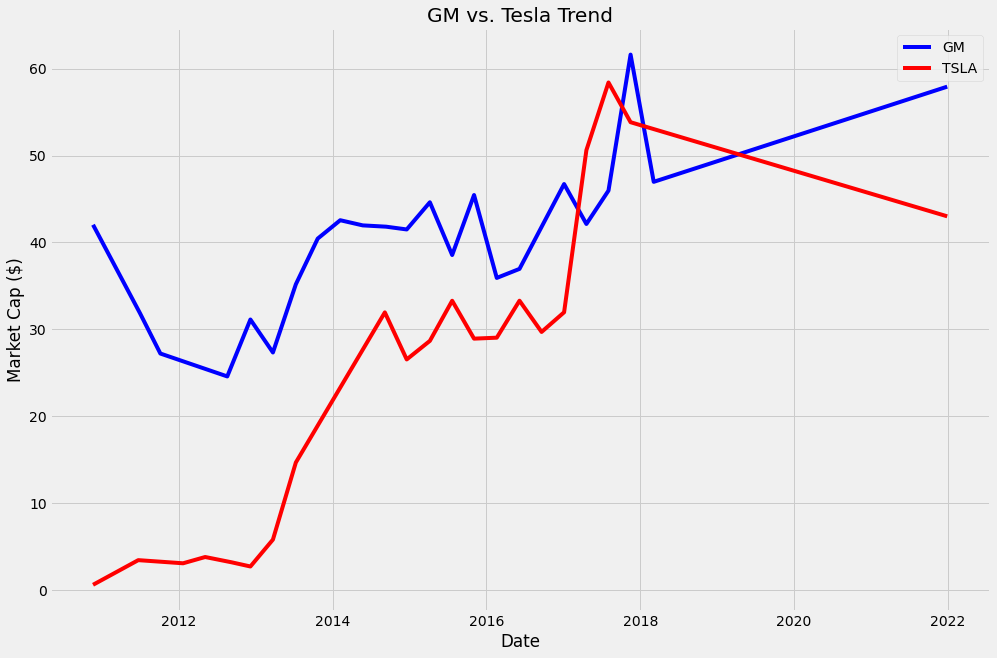

In [90]:
#plotting predicted trend
plt.figure(figsize=(15, 10))
plt.plot(forecast['Date'], forecast['gm_trend'], 'b-', label='GM')
plt.plot(forecast['Date'], forecast['tesla_trend'], 'r-', label='TSLA')
plt.xlabel('Date'); plt.ylabel('Market Cap ($)')
plt.legend()
plt.title('GM vs. Tesla Trend');

Text(0.5, 1.0, 'GM vs. Tesla Estimate')

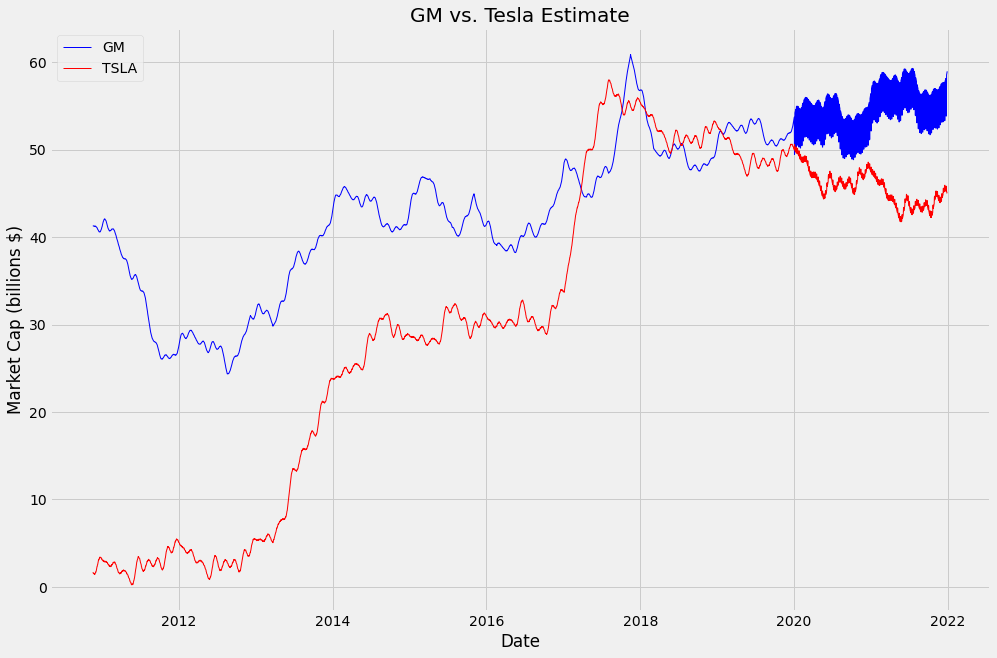

In [91]:
#plotting gm_yhat and tesla_yhat which are predicted market caps
figure(figsize=(15,10))
plt.plot(forecast['Date'], forecast['gm_yhat'], label='GM', color='blue', linewidth=1.0)
plt.plot(forecast['Date'], forecast['tesla_yhat'], label='TSLA', color='red', linewidth=1.0)
plt.xlabel('Date'); plt.ylabel('Market Cap (billions $)')
plt.legend()
plt.title('GM vs. Tesla Estimate')

In [94]:
overtake_date = min(forecast.loc[forecast['tesla_yhat'] > forecast['gm_yhat'], 'Date'])
print('Tesla overtakes GM on {}'.format(overtake_date))

Tesla overtakes GM on 2017-03-27 00:00:00


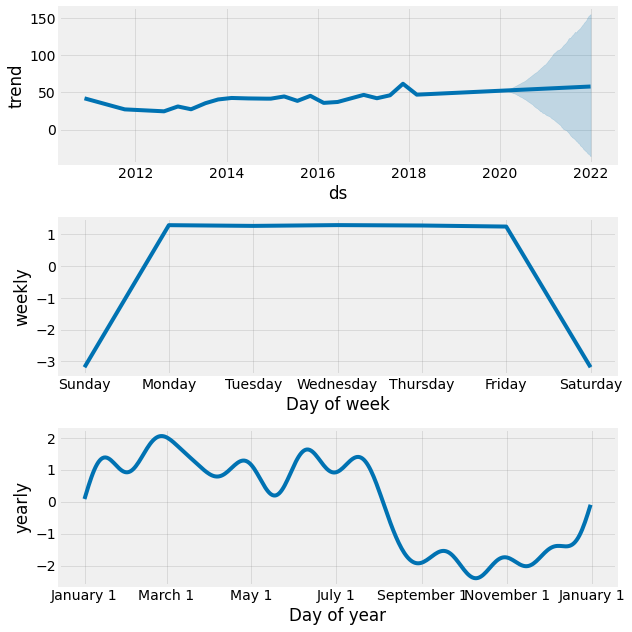

In [95]:
GM_prophet.plot_components(GM_forecast);

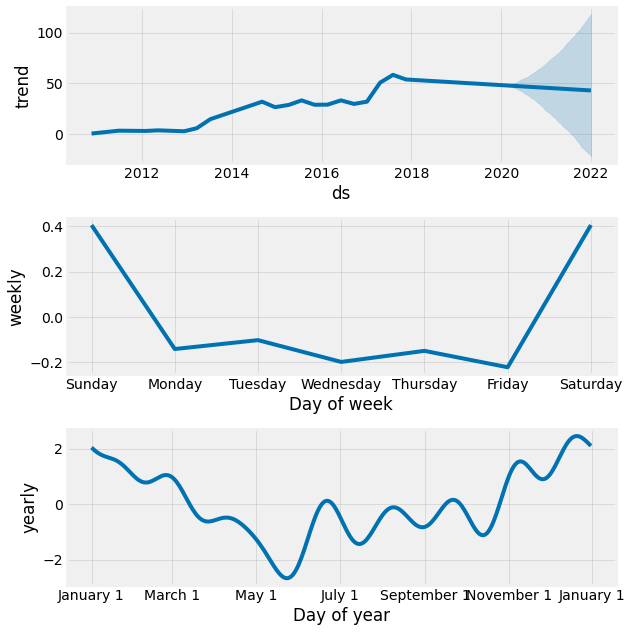

In [96]:
TSLA_prophet.plot_components(TSLA_forecast);